In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, metadata_tools
imp.reload(metadata_tools)
from metadata_tools import determine_imsize, determine_phasecenter, logprint
from metadata_tools import msmd, st, tb, qa, logprint, zero_to_2pi

In [5]:
import os
os.chdir('/lustre/cv/projects/ALMA_IMF/2017.1.01355.L/')

In [6]:
with open('continuum_mses.txt', 'r') as fh:
    continuum_mses = [x.strip() for x in fh.readlines()]

In [7]:
continuum_mses

['/lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X217/calibrated/W51-E_B6_uid___A001_X1296_X217_continuum_merged.cal.ms',
 '/lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X105/group.uid___A001_X1296_X106/member.uid___A001_X1296_X107/calibrated/W51-E_B3_uid___A001_X1296_X107_continuum_merged.cal.ms']

In [8]:
continuum_ms = continuum_mses[0]
field='W51-E'

In [9]:
coosys,racen,deccen = determine_phasecenter(ms=continuum_ms, field=field)
phasecenter = "{0} {1}deg {2}deg".format(coosys, racen, deccen)
(dra,ddec,pixscale) = list(determine_imsize(ms=continuum_ms, field=field,
                                            phasecenter=(racen,deccen),
                                            spw=0, makeplot=True))#, pixfraction_of_fwhm=1/4.))
imsize = [dra, ddec]
cellsize = ['{0:0.2f}arcsec'.format(pixscale)] * 2


Determining phasecenter of /lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X217/calibrated/W51-E_B6_uid___A001_X1296_X217_continuum_merged.cal.ms
Determining phasecenter of individual /lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X217/calibrated/W51-E_B6_uid___A001_X1296_X217_continuum_merged.cal.ms


RuntimeError: Error (Function not implemented) when acquiring lock on /lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X217/calibrated/W51-E_B6_uid___A001_X1296_X217_continuum_merged.cal.ms/table.lock

Determining phasecenter of /lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/W51-E_B6_uid___A001_X1296_X215_continuum_merged.cal.ms
Determining phasecenter of individual /lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/W51-E_B6_uid___A001_X1296_X215_continuum_merged.cal.ms
Phasecenter of /lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/W51-E_B6_uid___A001_X1296_X215_continuum_merged.cal.ms is 5.077757660437974 0.25321606540599334 ICRS
Determined phasecenter is ICRS 290.9340833333189deg 14.508211852672027deg
Determining imsize of /lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/W51-E_B6_uid_

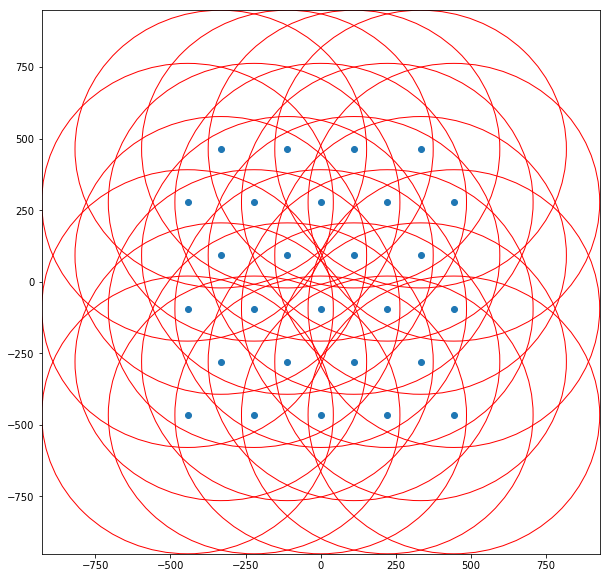

In [105]:
coosys,racen,deccen = determine_phasecenter(ms=continuum_ms, field=field)
phasecenter = "{0} {1}deg {2}deg".format(coosys, racen, deccen)
(dra,ddec,pixscale) = list(determine_imsize(ms=continuum_ms, field=field,
                                            phasecenter=(racen,deccen),
                                            spw=0, makeplot=True, exclude_7m=True))
imsize = [dra, ddec]
cellsize = ['{0:0.2f}arcsec'.format(pixscale)] * 2


In [26]:
print(f"Coordinate system: {coosys}, center={racen},{deccen}")
print(f"phasecenter={phasecenter}")
print(f"dra,ddec = {dra},{ddec}, pixscale={pixscale}")
print(f"imsize={imsize}, cellsize={cellsize}")

Coordinate system: ICRS, center=290.9340833333189,14.508211852672027
phasecenter=ICRS 290.9340833333189deg 14.508211852672027deg
dra,ddec = 2646,2646, pixscale=0.06
imsize=[2646, 2646], cellsize=['0.06arcsec', '0.06arcsec']


In [33]:
ms = continuum_ms
field = 'W51-E'
phasecenter = (racen, deccen)
spw = 0
pixfraction_of_fwhm=1/4.
min_pixscale=0.05

In [36]:
    cen_ra, cen_dec = phasecenter

    msmd.open(ms)

    field_matches = np.array([fld == field for fld in msmd.fieldnames()], dtype=bool)
    if not any(field_matches):
        raise ValueError("Did not find any matched for field {0}.  "
                         "The valid field names are {1}."
                         .format(field, msmd.fieldnames()))
    field_ids, = np.where(field_matches)
    logprint("Found field IDs {0} matching field name {1}."
             .format(field_ids, field))

    # only use the field IDs that have associated scans
    field_id_has_scans = np.array([len(msmd.scansforfield(fid)) > 0
                                   for fid in field_ids], dtype='bool')

    noscans = field_ids[~field_id_has_scans]
    if any(~field_id_has_scans):
        logprint("Found *scanless* field IDs {0} matching field name {1}."
                 .format(noscans, field))

    first_scan_for_field = [msmd.scansforfield(fid)[0]
                            for fid,fid_ok in zip(field_ids, field_id_has_scans)
                            if fid_ok
                           ]
    first_antid = [msmd.antennasforscan(scid)[0]
                   for scid in first_scan_for_field
                   if len(msmd.antennasforscan(scid)) > 0
                  ]

    # compute baselines to determine synth beamsize
    tb.open(ms+"/ANTENNA")
    positions = tb.getcol('POSITION')
    tb.close()

    # note that for concatenated MSes, this includes baselines that don't exist
    # (i.e., it includes baselines between TM1 and TM2 positions)
    baseline_lengths = (((positions[None,:,:]-positions.T[:,:,None])**2).sum(axis=1)**0.5)
    max_baseline = baseline_lengths.max()

    antsize = np.array([msmd.antennadiameter(antid)['value']
                        for antid in first_antid]) # m
    # because we're working with line-split data, we assume the reffreq comes
    # from spw 0
    freq = msmd.reffreq(spw)['m0']['value'] # Hz
    wavelength = 299792458.0/freq # m
    # go a little past the first null in each direction
    # (radians)
    primary_beam_fwhm = 1.22 * wavelength / antsize

Found field IDs [ 3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42] matching field name W51-E.


In [39]:
print(f"primary beam fwhm={primary_beam_fwhm*206265}, should be approximately 30arcsec")

primary beam fwhm=[ 49.88632727  49.88632727  49.88632727  49.88632727  49.88632727
  49.88632727  49.88632727  49.88632727  49.88632727  49.88632727
  49.88632727  29.10035757  29.10035757  29.10035757  29.10035757
  29.10035757  29.10035757  29.10035757  29.10035757  29.10035757
  29.10035757  29.10035757  29.10035757  29.10035757  29.10035757
  29.10035757  29.10035757  29.10035757  29.10035757  29.10035757
  29.10035757  29.10035757  29.10035757  29.10035757  29.10035757
  29.10035757  29.10035757  29.10035757], should be approximately 30arcsec


In [43]:
    # synthesized beam minimum size (max_baseline in m)
    synthbeam_minsize_fwhm = 1.22 * wavelength / max_baseline
    # (radians)
    pixscale = pixfraction_of_fwhm * synthbeam_minsize_fwhm

In [44]:
print(f"synthesized_beam: {synthbeam_minsize_fwhm*206265}, pixscale={pixscale*206265}")

synthesized_beam: 0.2498172365400357, pixscale=0.06245430913500893


In [47]:
    # round to nearest 0.01"
    if pixscale > 0.01/206265.:
        pixscale_as = np.floor((pixscale * 180/np.pi * 3600 * 100) % 100) / 100
        if pixscale_as < min_pixscale:
            pixscale_as = min_pixscale
        else:
            pixscale = pixscale_as * np.pi / 3600 / 180
        logprint("Pixel scale = {0} rad = {1} \" ".format(pixscale, pixscale_as))
    else:
        raise ValueError("Pixel scale was {0}\", too small".format(pixscale*206265))

    pb_pix = primary_beam_fwhm / pixscale


    def r2d(x):
        return x * 180 / np.pi

    ptgctrs = [msmd.phasecenter(ii) for ii in field_ids[field_id_has_scans]]

    ptgctrs_ra_deg, ptgctrs_dec_deg = (np.array([r2d(zero_to_2pi(pc['m0']['value'])) for pc in ptgctrs]),
                                       np.array([r2d(pc['m1']['value']) for pc in ptgctrs]))
    pix_centers_ra = (ptgctrs_ra_deg - cen_ra) / r2d(pixscale)
    pix_centers_dec = (ptgctrs_dec_deg - cen_dec) / r2d(pixscale)

    furthest_ra_pix_plus = (pix_centers_ra+pb_pix).max()
    furthest_ra_pix_minus = (pix_centers_ra-pb_pix).min()
    furthest_dec_pix_plus = (pix_centers_dec+pb_pix).max()
    furthest_dec_pix_minus = (pix_centers_dec-pb_pix).min()


Pixel scale = 2.9088820866572157e-07 rad = 0.06 " 


In [58]:
pl.matplotlib.patches.Circle?

Init signature: pl.matplotlib.patches.Circle(xy, radius=5, **kwargs)
Docstring:      A circle patch.
Init docstring:
Create true circle at center *xy* = (*x*, *y*) with given
*radius*.  Unlike :class:`~matplotlib.patches.CirclePolygon`
which is a polygonal approximation, this uses Bézier splines
and is much closer to a scale-free circle.

Valid kwargs are:
  agg_filter: unknown
  alpha: float or None 
  animated: [True | False] 
  antialiased or aa: [True | False]  or None for default 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  capstyle: ['butt' | 'round' | 'projecting'] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: matplotlib color spec
  contains: a callable function 
  edgecolor or ec: mpl color spec, None, 'none', or 'auto' 
  facecolor or fc: mpl color spec, or None for default, or 'n

[-1300, 1300, -1300, 1300]

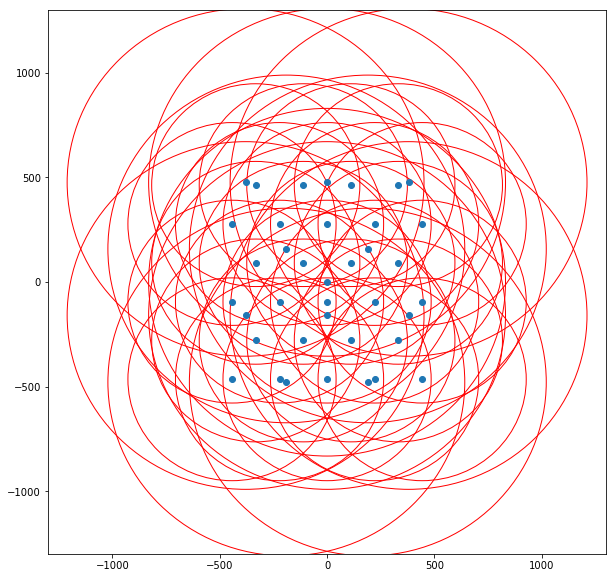

In [71]:
pl.figure(figsize=(10,10)).clf()
pl.plot(pix_centers_ra, pix_centers_dec, 'o')
circles = [pl.matplotlib.patches.Circle((x,y), radius=rad, facecolor='none', edgecolor='b')
           for x,y,rad in zip(pix_centers_ra, pix_centers_dec, pb_pix)]
collection = pl.matplotlib.collections.PatchCollection(circles)
collection.set_facecolor('none')
collection.set_edgecolor('r')
pl.gca().add_collection(collection)
pl.gca().axis([-1300,1300,-1300,1300])

In [68]:
circles[0].set_facecolor('none')
circles[0].get_facecolor()
circles[0].get_edgecolor()
collection.get_facecolor()

array([[ 0.12156863,  0.46666667,  0.70588235,  1.        ]])

In [54]:
print(furthest_dec_pix_minus, furthest_dec_pix_plus)
print(furthest_ra_pix_minus, furthest_ra_pix_plus)
print(pb_pix)

-1310.01240019 1307.92214254
-1211.16162108 1211.16162938
[ 831.43800685  831.43800685  831.43800685  831.43800685  831.43800685
  831.43800685  831.43800685  831.43800685  831.43800685  831.43800685
  831.43800685  485.005504    485.005504    485.005504    485.005504
  485.005504    485.005504    485.005504    485.005504    485.005504
  485.005504    485.005504    485.005504    485.005504    485.005504
  485.005504    485.005504    485.005504    485.005504    485.005504
  485.005504    485.005504    485.005504    485.005504    485.005504
  485.005504    485.005504    485.005504  ]


In [75]:
msmd.open(continuum_ms)
msmd.antennadiameter()

{'0': {'unit': 'm', 'value': 7.0},
 '1': {'unit': 'm', 'value': 7.0},
 '10': {'unit': 'm', 'value': 7.0},
 '11': {'unit': 'm', 'value': 12.0},
 '12': {'unit': 'm', 'value': 12.0},
 '13': {'unit': 'm', 'value': 12.0},
 '14': {'unit': 'm', 'value': 12.0},
 '15': {'unit': 'm', 'value': 12.0},
 '16': {'unit': 'm', 'value': 12.0},
 '17': {'unit': 'm', 'value': 12.0},
 '18': {'unit': 'm', 'value': 12.0},
 '19': {'unit': 'm', 'value': 12.0},
 '2': {'unit': 'm', 'value': 7.0},
 '20': {'unit': 'm', 'value': 12.0},
 '21': {'unit': 'm', 'value': 12.0},
 '22': {'unit': 'm', 'value': 12.0},
 '23': {'unit': 'm', 'value': 12.0},
 '24': {'unit': 'm', 'value': 12.0},
 '25': {'unit': 'm', 'value': 12.0},
 '26': {'unit': 'm', 'value': 12.0},
 '27': {'unit': 'm', 'value': 12.0},
 '28': {'unit': 'm', 'value': 12.0},
 '29': {'unit': 'm', 'value': 12.0},
 '3': {'unit': 'm', 'value': 7.0},
 '30': {'unit': 'm', 'value': 12.0},
 '31': {'unit': 'm', 'value': 12.0},
 '32': {'unit': 'm', 'value': 12.0},
 '33': {'u

In [77]:
first_antid.remove(0)

In [80]:
len(first_scan_for_field)

38

In [81]:
len(first_antid)

37

In [106]:
msmd.close()

True